In [721]:
## Part 1: Data scraping and preparation
### Step 1: Scrape your competitor's data 

In [722]:
# 1. import the necessary python packages
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
# make header so request doesnt get denied
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
'From': 'pleaseletmein@gmail.com'
}
# 2.  Use requests to get (as in, HTTP GET) the URL
got = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html",  headers=headers)
# 3.  Extract the text from the page
extracted_text = got.content 

# 4.  Use BeautifulSoup to read and parse the data, either as html or lxml
content = BeautifulSoup(extracted_text, 'html.parser')
# 5.  Use prettify() to view the content and find the appropriate table
# content.prettify()

In [723]:
# 6.  Use find() to save the aforementioned table as a variable
# creates a length 51 result set of table rows.
# each row starts with <tr> tag and ends with <tr> tage
tabledata = content.table.find_all('tr')




In [724]:
# visualize what we are working with
for row in tabledata:
        for td in row.find_all('td'):
            # we only want the text between the tags so we do .text
            info_between_tags = td.text
            print(info_between_tags)    

1
X28+
2003/11/04
0486
19:29
19:53
20:06
 MovieView archive
2
X20+
2001/04/02
9393
21:32
21:51
22:03
 MovieView archive
3
X17.2+
2003/10/28
0486
09:51
11:10
11:24
 MovieView archive
4
X17+
2005/09/07
0808
17:17
17:40
18:03
 MovieView archive
5
X14.4
2001/04/15
9415
13:19
13:50
13:55
 MovieView archive
6
X10
2003/10/29
0486
20:37
20:49
21:01
 MovieView archive
7
X9.4
1997/11/06
8100
11:49
11:55
12:01
 MovieView archive
8
X9.3
2017/09/06
2673
11:53
12:02
12:10
 MovieView archive
9
X9
2006/12/05
0930
10:18
10:35
10:45
 MovieView archive
10
X8.3
2003/11/02
0486
17:03
17:25
17:39
 MovieView archive
11
X8.2
2017/09/10
2673
15:35
16:06
16:31
 MovieView archive
12
X7.1
2005/01/20
0720
06:36
07:01
07:26
 MovieView archive
13
X6.9
2011/08/09
1263
07:48
08:05
08:08
 MovieView archive
14
X6.5
2006/12/06
0930
18:29
18:47
19:00
 MovieView archive
15
X6.2
2005/09/09
0808
19:13
20:04
20:36
 MovieView archive
16
X6.2
2001/12/13
9733
14:20
14:30
14:35
 MovieView archive
17
X5.7
2000/07/14
9077
10:03
10:

In [725]:
# 7.  Use pandas to read in the HTML file.  HINT make-sure the above data is properly typecast.
# 8.  Set reasonable names for the table columns, e.g., rank, x_classification, date, region, start_time, maximum_time, end_time, movie. `Pandas.columns` makes this very simple.
df = pd.DataFrame(columns = ['rank','x_class','date','region','start_time','max_time','end_time','movie'])
# this function goes through each row, <tr> and finds the entries of 
# that row, <td>
pattern = r'^X.*'
data = ['rank','x_class','date','region','start_time','max_time','end_time','movie']
def parse_table(tabledata):
    # create the keys
    mydata = ['rank','x_class','date','region','start_time','max_time','end_time','movie']
    # fill it with 'none values' for every key
    mydata = {key: None for key in mydata}
    i = 0
    for row in tabledata:
        for td,key in zip(row.find_all('td'),data):
            # we only want the text between the tags so we do .text
            # create a value for every key
            # but be sure to strip the values of unwanted '+' character
            entry = td.text
            new_entry = ''.join(char for char in entry  if char != '+')
            # be sure that every entry is a float not an int, but only
            # do this in the x_class entries
            if re.match(pattern, new_entry):
                # if it starts with X, seperate the X and the number
                # convert the number to float, then join them back
                new_entry = new_entry[1:]
                new_entry = float(new_entry)
                new_entry = str(new_entry)
                new_entry = 'X' + new_entry
            mydata[key] = new_entry
            # mydata[key] = td.text
        # make every row of the dataframe, the row of this dictionary we just
        # worked on
        df.loc[i] = mydata
        i += 1
        # print(mydata)
parse_table(tabledata)

# drop the first row of dummy values
df = df.drop(df.index[0])

# (b) output showing the output of your code, similar to the examples above, 
df

# (c) a short prose description of how your code works.
# The first thing we did is we requested the html from the website. Once we got that html we use
# beautiful soup to parse it into something more useful. Then we used find all to get info that populates
# each row of the table. Once we get those rows we save them as a table. For each row in the table match the 
# pattern that describes the format of an entry, converting each entry to the appropriate data type. 

,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28.0,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
4,4,X17.0,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10.0,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9.0,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


In [726]:
### Step 2: Tidy the top 50 solar flare data (10 pts)


In [727]:
# 1.  Drop the last column of the table, since we are not going to use it moving forward.
df = df.drop(df.columns[-1], axis=1)

# 2.  Use datetime import to combine the date and each of the three time columns into three datetime columns. You will see why this is useful later on.  iterrows() should prove useful here.
import datetime

# 3.  Update the values in the dataframe as you do this.  Pandas.at or Pandas.iat should prove useful.
for index, row in df.iterrows():
    # concatenate the date with the clock time to get a full string of both
    date_and_start = (row['date'] + ' ' + row['start_time'])
    date_and_max = (row['date'] + ' ' + row['max_time'])
    date_and_end = (row['date'] + ' ' + row['end_time'])
    # turn that concatenated value to a datetime and replace the relevant entries
    df.at[index, 'start_time'] = pd.to_datetime(date_and_start)
    df.at[index, 'max_time'] = pd.to_datetime(date_and_max)
    df.at[index, 'end_time'] = pd.to_datetime(date_and_end)

# 4.  Set regions coded as - as missing (NaN). You can use dataframe.replace() here.
# Replace "-" with NaN
df = df.replace("-", np.nan)

# drop the date column, redundant
df = df.drop('date', axis=1)
# move the region column to the last position
column_to_move = 'region'

# Move the column to the last position
cols = [col for col in df.columns if col != column_to_move] + [column_to_move]
df = df[cols]

# (b) output showing the output of your code, similar to the examples above, 
df

# (c) a short prose description of how your code works.
# First we drop useless columns. Then loop through the dataframe, and concatenate the date with clocktime
# then convert that value to a datetime object. We then store those datetimes in our dataframe. Next
# we replace missing values, and re-order the columns to match the example.

,rank,x_class,start_time,max_time,end_time,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


In [728]:
# ### Step 3: Scrape the NASA data
# 2.  Use requests to get (as in, HTTP GET) the URL
got = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
# 3.  Extract the text from the page
extracted_text = got.content 
# 4.  Use BeautifulSoup to read and parse the data, either as html or lxml
content = BeautifulSoup(extracted_text, 'html.parser')
# 5.  Use prettify() to view the content and find the appropriate table
string = content.get_text()

# create the dataframe structure we will insert these rows into
df2 = pd.DataFrame(columns = ['start_date','start_time','end_date', 'end_time','start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'])


pattern = r'\d{4}/\d{2}/\d{2} \d{2}:\d{2} \d{2}/\d{2} \d{2}:\d{2}\s*\S+\s*\S+\s*\S+\s*\S+\s*\S+\s*\S+\s*\S+\s*\S+\s*\S+\s*\S+'
matches =  re.findall(pattern, string)


# should be 522 * 15
# print(len(matches))
# if a our extracted string matches our pattern, insert that pattern into the df2
for match in matches:
    # split takes a string "hi how are you" -> ["hi","how","are","you"] since dataframe needs that format
    new_row = match.split()
    df2.loc[len(df2)] = new_row

# make index start at 1 rather than 0
df2.index = range(1, len(df2) + 1)

# (b) output showing the output of your code, similar to the examples above, 
print(df2)

# (c) a short prose description of how your code works.
# We get the webpage html and parse it. This time the data isnt structured, but get_text helps with that.
# We then create a dataframe of only columns, this is where we will insert things to. Then we create a specific pattern
# that only the lines of the unformatted table can match to, effectively ignoring the rest of the unwanted string at the
# top of the scraped string. Once we have those rows, we then use split to format it into a form that dataframe can accept as
# a row. After that we make it 1 indexed instead of 0 indexed, like the example.


### Step 4: Tidy the NASA table 


# 2.  The CPA column (cme_angle) contains angles in degrees for most rows, 
# except for halo flares, which are coded as Halo. Create a new column that
# indicates if a row corresponds to a halo flare or not,
# and then replace Halo entries in the cme_angle column as NA.
df2['is_halo'] = True
for index,col in df2.iterrows():
    if df2.loc[index,'cme_angle']  == 'Halo':
        df2.loc[index,'is_halo'] = True
    else:
        df2.loc[index,'is_halo'] = False
# replace halo with na
df2 = df2.replace("Halo", np.nan)


# 3.  The width column indicates if the given value is a lower bound.
# Create a new column that indicates if width is given as a lower bound, 
# and remove any non-numeric part of the width column.
df2['width_lower_bound'] = True
for index,col in df2.iterrows():
    if df2.loc[index,'cme_width'].startswith(">"):
        df2.loc[index,'width_lower_bound'] = True
        # remove any non numeric part 
        df2.loc[index,'cme_width'] = np.nan
    else:
        df2.loc[index,'width_lower_bound'] = False



# we do this here because its easier to work with string than nan in previous steps
#1. Recode any missing entries as NaN
df2 = df2.replace("????", np.nan)
df2 = df2.replace("---", np.nan)
df2 = df2.replace("----", np.nan)
df2 = df2.replace("-----", np.nan)
df2 = df2.replace("------", np.nan)
df2 = df2.replace("--/--", np.nan)
df2 = df2.replace("--:--", np.nan)



# 4.  Combine date and time columns for start, end and cme so they can be encoded as datetime objects.
df2['start_datetime'] = np.nan
df2['end_datetime'] = np.nan
df2['cme_datetime'] = np.nan

for index, row in df2.iterrows():
     # make sure all 24:00, are 0:00 so the string can be converted to dadtetime sucessfully
    if row['start_time'] == '24:00':
        row['start_time'] = '0:00'
    # concatenate the date with the clock time to get a full string of both
    start_datetime = (row['start_date'] + ' ' + row['start_time'])

     # make sure all 24:00, are 0:00 so the string can be converted to dadtetime sucessfully
    if row['end_time'] == '24:00':
        row['end_time'] = '0:00'

    # we use the start_date year in our incomplete end_date
    end_datetime = row['start_date'][:5] + row['end_date'] + ' ' + row['end_time']

    
    # make sure all 24:00, are 0:00 so the string can be converted to dadtetime sucessfully
    if row['cme_time'] == '24:00':
        row['cme_time'] = '0:00'

    if pd.isna(row['cme_time']):
        row['cme_datetime'] = np.nan
    elif pd.isna(row['cme_date']):
        row['cme_datetime'] = np.nan
    else:
        cme_datetime = row['start_date'][:5] + row['cme_date'] + ' ' + row['cme_time']
        df2.at[index, 'cme_datetime'] = pd.to_datetime(cme_datetime)
    # turn that concatenated value to a datetime and replace the relevant entries
    df2.at[index, 'start_datetime'] = pd.to_datetime(start_datetime)
    df2.at[index, 'end_datetime'] = pd.to_datetime(end_datetime)
       


# Reorder to appear the way that makes more sense
desired_order = ['start_datetime','start_date','start_time','end_datetime','end_date', 'end_time','start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification','cme_datetime', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed','is_halo','width_lower_bound']
df2 = df2.reindex(columns=desired_order)

# drop redundant columns
df2 = df2.drop('start_date', axis=1)
df2 = df2.drop('start_time', axis=1)
df2 = df2.drop('end_date', axis=1)
df2 = df2.drop('end_time', axis=1)
df2 = df2.drop('cme_date', axis=1)
df2 = df2.drop('cme_time', axis=1)



# display all rows
# pd.set_option('display.max_rows', None)
# df2.head()

# (b) output showing the output of your code, similar to the examples above, 
df2

# (c) a short prose description of how your code works.
# First we create a column of is halo values. Then, depending on if there was a halo, we change the entry
# to either true or false. We do the same thing for lowerbound. Next we replace all -- and ?? style missing values.
# After that we create some datetime columns to be used later. We concatenate the dates with times and convert to datetime. 
# For cme and end dates we use the same year as the start date by accessing its first 4 characters of its string and concatenating
# them to cme and end. Next we reorder it and drop redundant columns to match the example.


     start_date start_time end_date end_time start_frequency end_frequency  \
1    1997/04/01      14:00    04/01    14:15            8000          4000   
2    1997/04/07      14:30    04/07    17:30           11000          1000   
3    1997/05/12      05:15    05/14    16:00           12000            80   
4    1997/05/21      20:20    05/21    22:00            5000           500   
5    1997/09/23      21:53    09/23    22:16            6000          2000   
6    1997/11/03      05:15    11/03    12:00           14000           250   
7    1997/11/03      10:30    11/03    11:30           14000          5000   
8    1997/11/04      06:00    11/05    04:30           14000           100   
9    1997/11/06      12:20    11/07    08:30           14000           100   
10   1997/11/27      13:30    11/27    14:00           14000          7000   
11   1997/12/12      22:45    12/12    23:20           14000          8000   
12   1998/01/25      15:03    01/25    15:18           14000    

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
8,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,True,False
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


In [729]:
# Part 2: Analysis



In [730]:
### Question 1: Replication (10 pts)
# Include code used to get the top 50 solar flares from the NASA table

sorted_df2 = df2.sort_values(by='flare_classification', ascending=False)
# Drop rows after index 92, so we only deal with X flares
sorted_df2 = sorted_df2.drop(sorted_df2.index[92:])

# # Sort the rows based on the second character in 'Column 1'
sorted_df2 = sorted_df2.iloc[sorted_df2['flare_classification'].apply(lambda x: float(x[1:])).argsort()]
# invert it, since its in the wrong order at this point
sorted_df2 = sorted_df2[::-1]

# fix the broken indexes
sorted_df2.index = range(1, len(sorted_df2) + 1)

# Drop rows after index 50
sorted_df2 = sorted_df2.drop(sorted_df2.index[50:])

sorted_df2
# Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

# Yes, a lot of the data is replicable, however, after a comparing a
# handful of rows you may notice some differences. for example Spaceweather has
# the 2005/09/07 flare listed as X17+, whereas NASA has it listed as X1.7. This
# discrepency is very suspicious and could likely be an error in the tools or people who recorded
# the flare data. We also notice that NASA only uses 4 characters at max, to record the intensity,
# so a Spaceweather "X14.4", may be truncated as "X14." as is the case with the index 4 entry.



,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
3,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
5,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,False
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False
10,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False


In [731]:
# Compare the above NASA top 50 with the spaceweather top 50!
df

,rank,x_class,start_time,max_time,end_time,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


In [732]:

### Question 2: Integration (15 pts)

# Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

# we need these for NLP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# this function calculates a similarity score between 2 rows
def calculate_row_similarity(row1, row2):
    # Convert rows to strings
    string1 = ' '.join(row1.astype(str))
    string2 = ' '.join(row2.astype(str))

    # Create a CountVectorizer instance
    vectorizer = CountVectorizer()

    # Fit and transform the strings
    string_vectors = vectorizer.fit_transform([string1, string2])

    # Calculate cosine similarity
    similarity_score = cosine_similarity(string_vectors[0], string_vectors[1])[0][0]

    return similarity_score

# For every spaceweather row, find the NASA row with the best similarity by
# looping through all 50 NASA rows and only keeping the one with the max similarity score
# once that max is confirmed, upon completion of the loop, paste it to the dictionary
# which holds key value pairs of the "{ spaceweather row # " as a key, and the " : best matching NASA row # }" as a value

# create a dictionary that holds spaceweather row # as a key and NASA row # as a value
best_matches = {}

####
# loop through spaceweather
for index1,row1 in df.iterrows(): 
    max_similarity_index = 0
    max_similarity = 0
    # loop through NASA
    for index2, row2 in sorted_df2.iterrows():   
        curr_similarity = calculate_row_similarity(row1, row2)
        # if the curr similarity is greater than the previous, update the similarity and the index
        if curr_similarity > max_similarity:
            max_similarity = curr_similarity
            max_similarity_index = index2
                
            # print(similarity)
    # now that we have the index of the best similarity we found, push it to the dictionary as the value,
    # of the current index we are working with
    best_matches[index1] = max_similarity_index
print("Best matches: ")
print(best_matches)
####

# In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches. 

# Explanation:
# In this function we calculate how similar rows of a dataframe are by first transforming
# that row into a string, vectorizing that string, and then using cosine similarity
# to compare those vectors.

# How it works:
# For every spaceweather row, find the NASA row with the best similarity by
# looping through all 50 NASA rows and only keeping the one with the max similarity score
# once that max is confirmed, upon completion of the loop, paste it to the dictionary
# which holds key value pairs of the "{ spaceweather row # " as a key, and the " : best matching NASA row # }" as a value

# Finally, use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset.

# iterate through the matches dictionary, adding each entry to a new dictionary that will become a column
# make an array of 50 false values
new_column = [[] for _ in range(50)]
for spaceweather_row_num, nasa_row_num in best_matches.items():
    # print(spaceweather_row_num, nasa_row_num)
    # this goes in the nasa table so we use nasa index
    # we do -1 since the dic values start at 1, rather than 0
    new_column[nasa_row_num-1].append(spaceweather_row_num)

sorted_df2['SpaceWeatherLive Rank'] = new_column

# display the new table with the new column. empty [] indicates a close spaceweather rank was not found for this row.
# we use an array since multiple space rank rows may have selected that nasa row as its best match
sorted_df2  


Best matches: 
{1: 1, 2: 2, 3: 3, 4: 47, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 26, 17: 15, 18: 16, 19: 17, 20: 45, 21: 3, 22: 18, 23: 19, 24: 32, 25: 20, 26: 21, 27: 22, 28: 32, 29: 23, 30: 44, 31: 14, 32: 46, 33: 24, 34: 25, 35: 26, 36: 30, 37: 27, 38: 1, 39: 28, 40: 3, 41: 29, 42: 27, 43: 30, 44: 26, 45: 12, 46: 33, 47: 31, 48: 32, 49: 35, 50: 34}


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,SpaceWeatherLive Rank
1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,"[1, 38]"
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,[2]
3,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False,"[3, 21, 40]"
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,[5]
5,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False,[6]
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,[7]
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False,[8]
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,False,[9]
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False,[10]
10,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False,[11]


In [733]:
### Question 3: Analysis (10 pts)

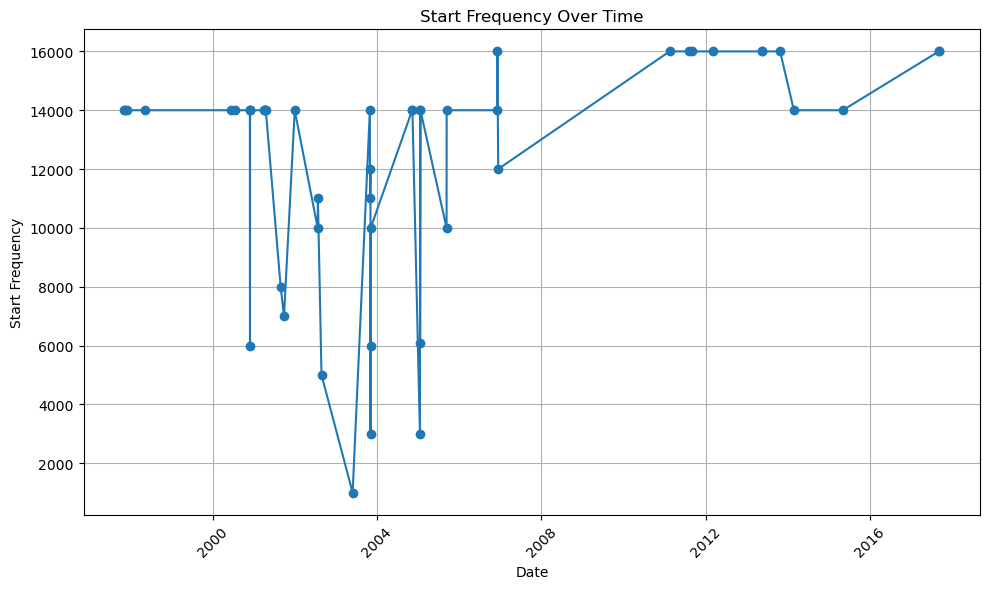

In [734]:
# we need this to plot
import matplotlib.pyplot as plt

# 1.  Plot attributes in the NASA dataset (e.g., starting or ending frequenciues, flare height or width) over time. 
# Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.

# sort the NASA dataset by date
date_sorted_df2 = sorted_df2.sort_values(by='start_datetime')
# convert all start frequency values to a float to prevent graphing errors
date_sorted_df2['start_frequency'] = date_sorted_df2['start_frequency'].astype(float)
# Plotting the values over time
plt.figure(figsize=(10, 6))
plt.plot(date_sorted_df2['start_datetime'],date_sorted_df2['start_frequency'], marker='o')
plt.xlabel('Date')
plt.ylabel('Start Frequency')
plt.title('Start Frequency Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 # (a) a short description (2 sentences) of what the intent of your plot is (think in terms of our discussion on how we show variation, co-variation in terms of central trend, spread, skew etc.)
# The intention graph shows start frequencies over time. We would like to expore trends in our data, like how much variance there is between the distribution of points, 
# where the majority is centered, and explore how the date of these recordings may play a role in the data that is collected.
    
# (c) a short text description of your plot, 
# This is a line plot which uses sorted datetimes,x and accompaning start frequencies,y to display start frequency over time.

# (d) a sentence or two of interpretation of your plot (again think of variation, co-variation, etc.).
# One thing we notice is that there is less variability after 2007. Before 2008, values are all over the place. Theres all sorts of reasons why
# this may occur. Is there a change in recording tool accuracy? Are there environmental factors at play that are trending nature to behave differently
# than before 2007? 
